In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#dataset

np.random.seed()
n = 100

x = np.linspace(-3,3,n).reshape(-1,1)
y = np.exp(-x**2)+ 1.5*np.exp(-(x-2)**2) + np.random.normal(0,.1,x.shape)

a) Write a first code which sets up a design matrix $\mathbf{X}$ defined by a fifth-order polynomial and split your data set in training and test data.

In [3]:
def makeDesignMatrix(degree,x,y):
    X = np.zeros((len(y),degree+1))
    X[:,0] = 1
    for i in range(1,degree+1):
        X[:,i] = x.flatten()**i
    return X

b) Write thereafter (using either scikit-learn or your matrix inversion code using for example numpy) and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.

In [4]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.2)


In [30]:
X_train = makeDesignMatrix(5,x_train,y_train)
beta_train = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
beta_train

array([[ 0.82078399],
       [ 0.29063761],
       [-0.02889806],
       [ 0.04900128],
       [-0.00338052],
       [-0.00831225]])

In [29]:
# teve uma outra maneira que eu tinha feito antes que foi usando isso
beta_train2 = np.linalg.pinv(X_train) @ y_train
beta_train2

array([[ 0.82078399],
       [ 0.29063761],
       [-0.02889806],
       [ 0.04900128],
       [-0.00338052],
       [-0.00831225]])

In [15]:
def f(x,beta,y):
    X = makeDesignMatrix(5,x,y)
    return X @ beta


In [16]:
y_tilde = f(x_train,beta_train,y_train)

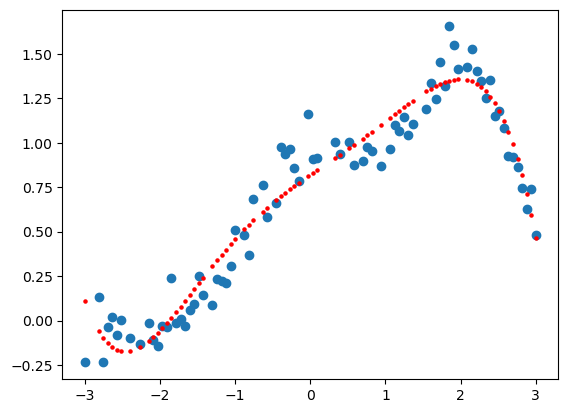

In [17]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_tilde,s=5,c='red')

In [18]:
y_tilde_test = f(x_test,beta_train,y_test)

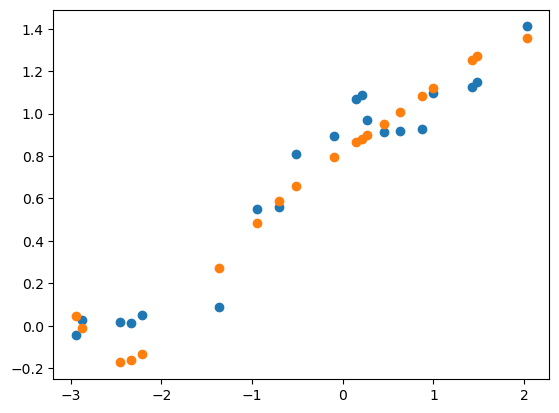

In [19]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_tilde_test)

In [20]:
#usando sklearn

from sklearn.preprocessing import PolynomialFeatures

In [21]:
quadraticfit = PolynomialFeatures(5)

In [22]:
x_train_quadratic = quadraticfit.fit_transform(x_train)
y_train_quadratic = quadraticfit.fit_transform(y_train)

In [23]:
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(x_train_quadratic,y_train_quadratic)
xx_quadratic = quadraticfit.transform(x.reshape(x.
shape[0], 1))


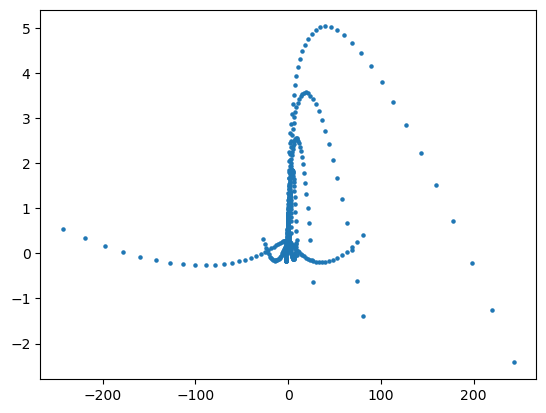

In [24]:
plt.scatter(xx_quadratic,regressor_quadratic.predict(xx_quadratic),s=5) # tem algo mt errado aqui KK